In [7]:
import sys
sys.path.insert(0, '../../cider/cider')

# Featurizer

In [8]:
from datastore import DataStore
from featurizer import Featurizer

Load some mobile phone metadata. See {doc}`standardized data formats <../data_formats/cdr>` for file schemas. 

In [11]:
datastore = DataStore(cfg_dir='../../cider/configs/config.yml')
featurizer = Featurizer(datastore=datastore, clean_folders=True)

21/10/26 10:50:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


Loading CDR...


Loading recharges...
SUCCESS!
Loading mobile data...
Loading mobile data...
Loading antennas...


Remove duplicate records, filter to just a specific date range, remove outlier days and spammers based on call and text volumes, and remove duplicate records in CDR, recharges, mobile data records, and mobile money records.

In [4]:
# Deduplication
featurizer.ds.deduplicate()

# Filter to just January 1 - February 28 (inclusive)
featurizer.ds.filter_dates('2020-01-01', '2020-02-28')

# Remove transactions involving spammers who place 1.8+ calls/texts per active day
spammers = featurizer.ds.remove_spammers(spammer_threshold=1.8)

Number of spammers identified: 20


In [5]:
# Remove all records from days more than 2 standard deviations from the mean transaction volume
outlier_days = featurizer.ds.filter_outlier_days(num_sds=2)

Outliers removed: 2020-01-24, 2020-02-06


Produce summary statistics and plots.

In [6]:
print(featurizer.diagnostic_statistics())

{'CDR': {'Days': 60, 'Transactions': 92719, 'Subscribers': 980, 'Recipients': 980}, 'Recharges': {'Days': 60, 'Transactions': 9452, 'Subscribers': 782}, 'Mobile Data': {'Days': 60, 'Transactions': 9548, 'Subscribers': 591}, 'Mobile Money': {'Days': 60, 'Transactions': 5469, 'Subscribers': 682, 'Recipients': 682}}


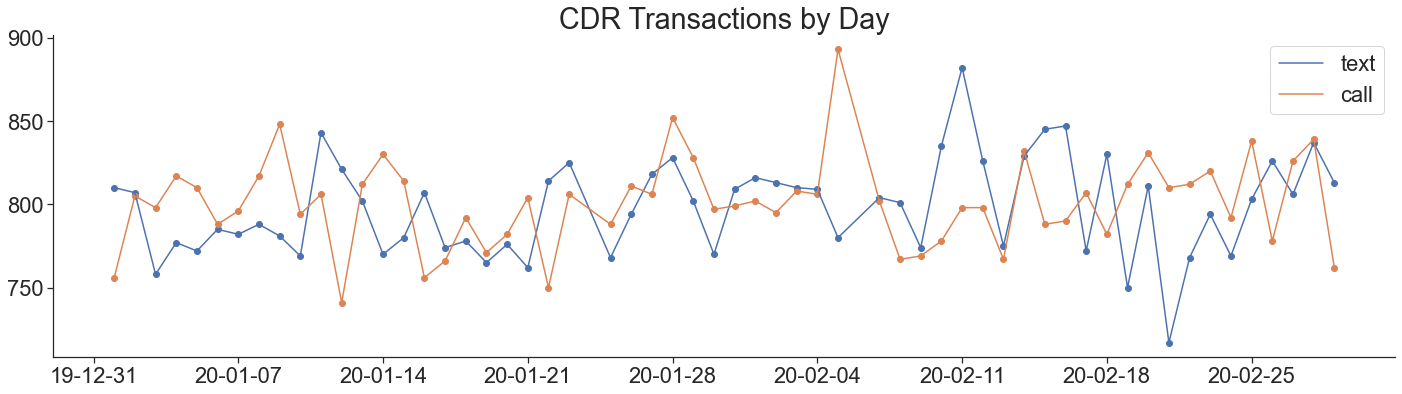

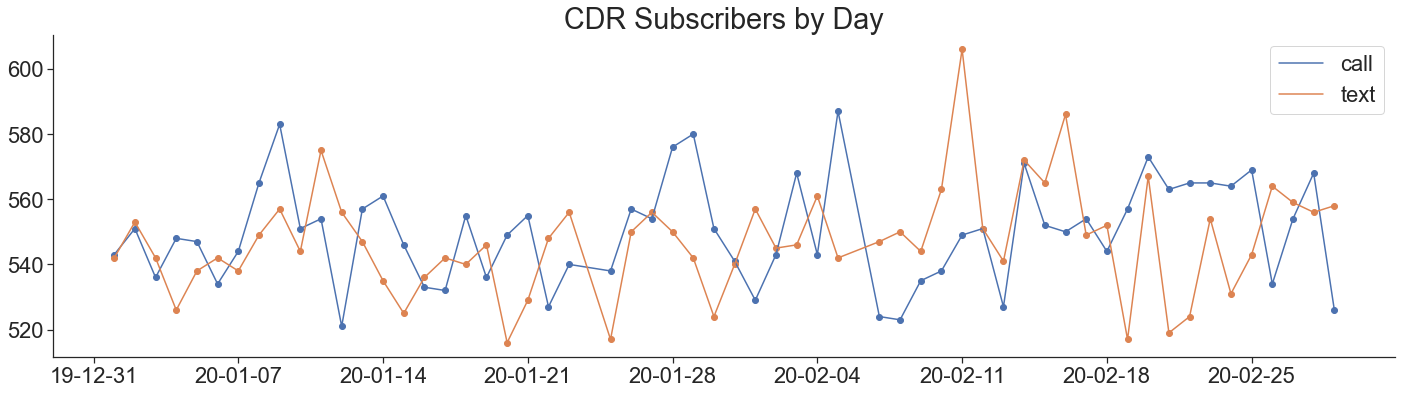

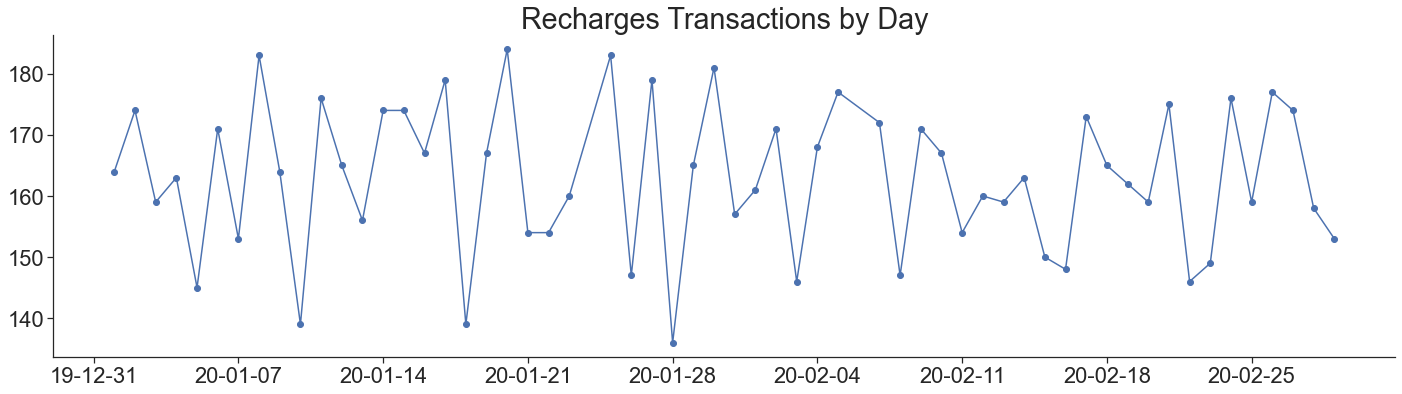

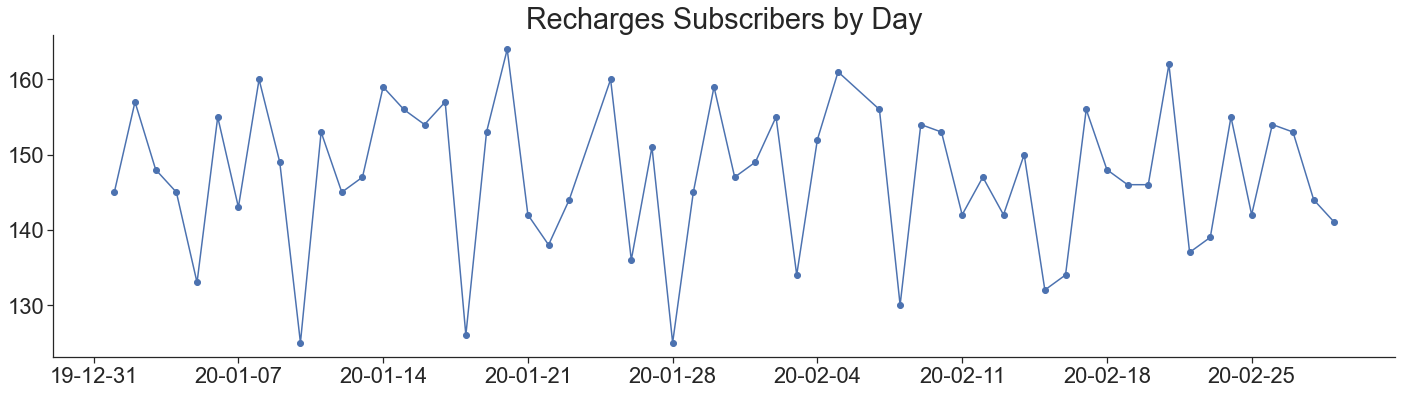

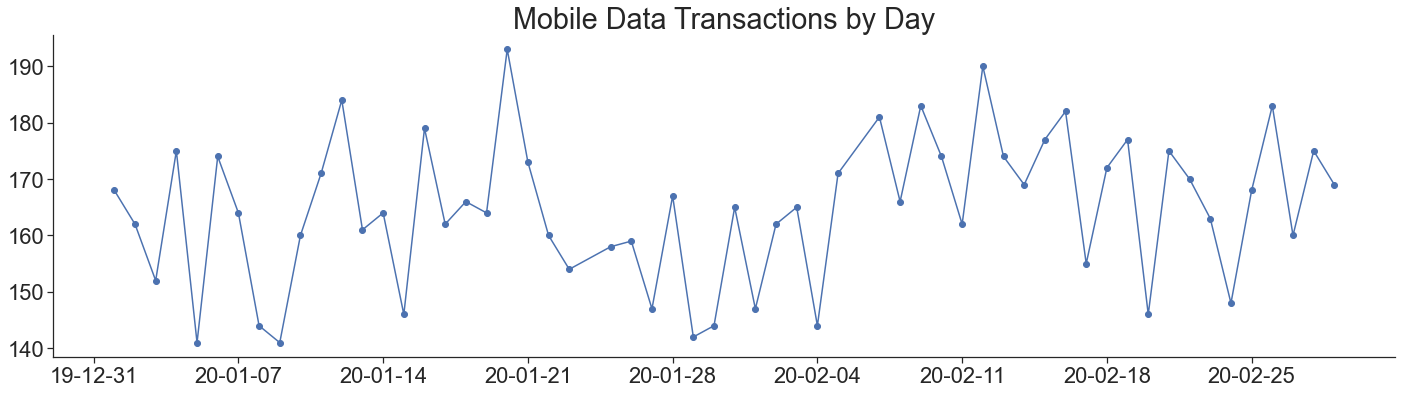

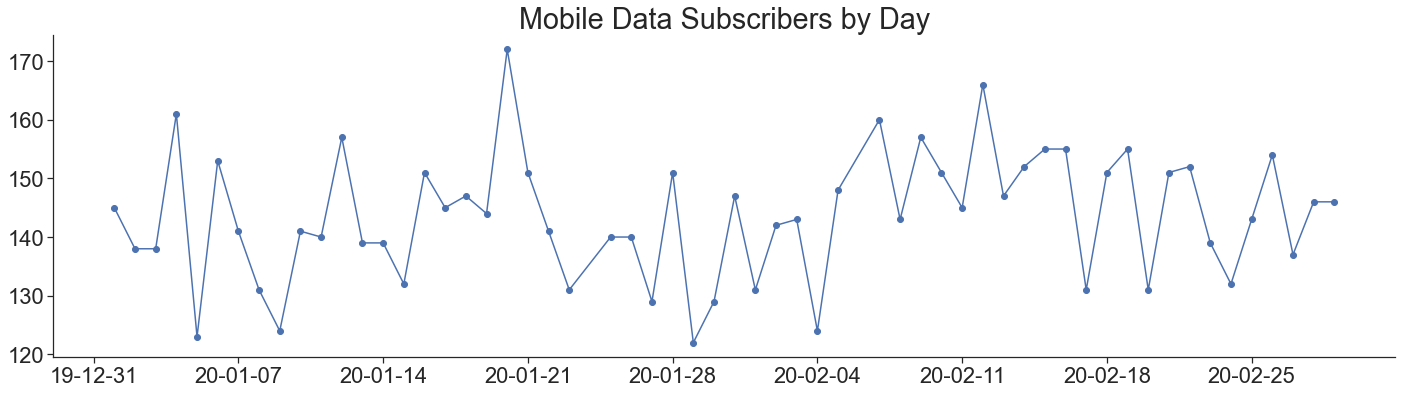

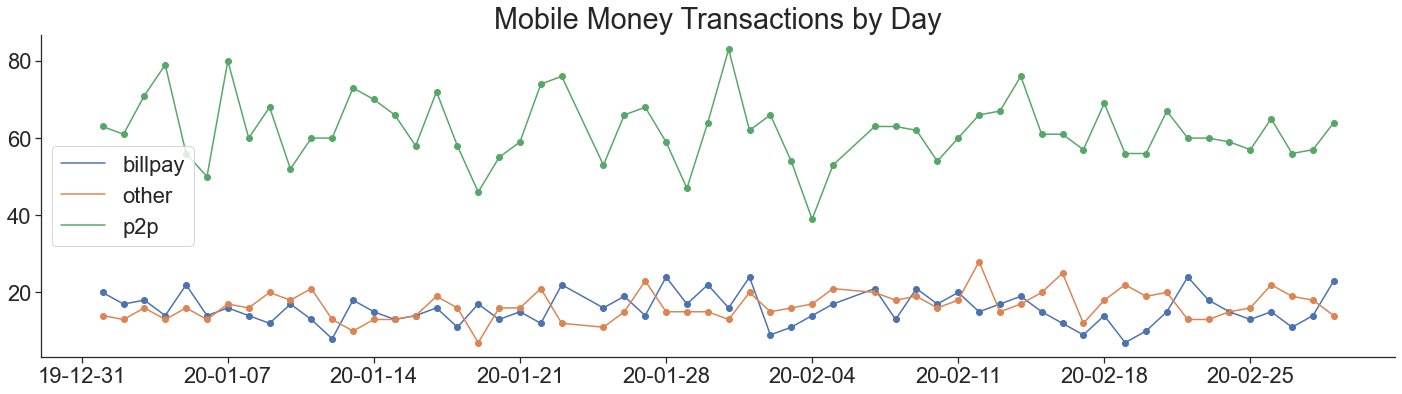

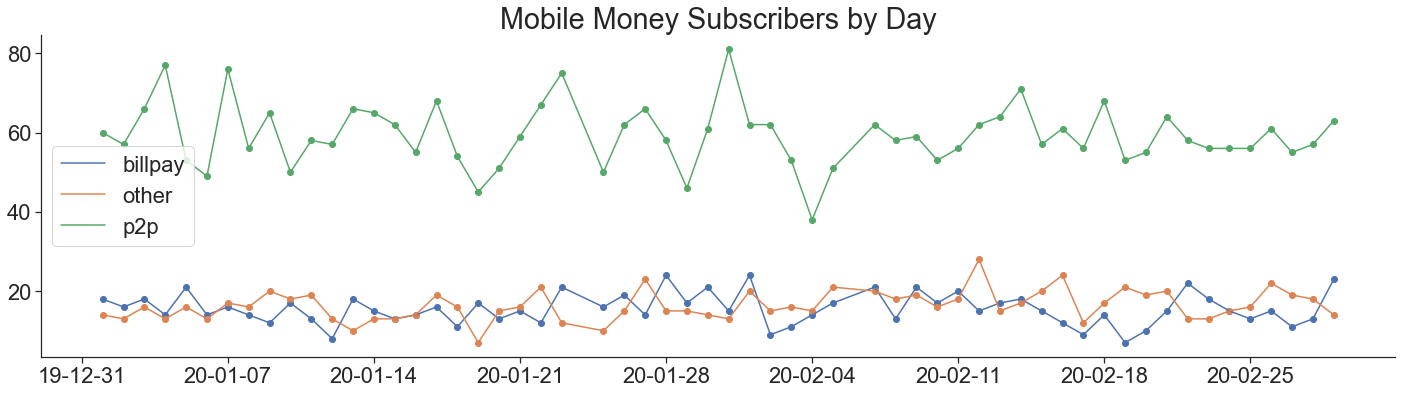

In [7]:
featurizer.diagnostic_plots()

Featurize the data

In [12]:
featurizer.cdr_features()
featurizer.international_features()
featurizer.location_features()
featurizer.recharges_features()
featurizer.mobiledata_features()
featurizer.mobilemoney_features()
featurizer.all_features()

Calculating CDR features...


         No antennas file was given and records are using antennas for position.
[x] 184 records from 2020-01-01 01:58:28 to 2020-02-29 19:01:57
[x] 173 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 209 records from 2020-01-01 08:02:22 to 2020-02-29 23:54:24
[x] 187 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 205 records from 2020-01-01 13:39:38 to 2020-02-29 14:37:41
[x] 193 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 218 records from 2020-01-01 09:28:21 to 2020-02-29 20:23:01
[x] 195 cont

         No antennas file was given and records are using antennas for position.
[x] 213 records from 2020-01-01 12:25:22 to 2020-02-29 14:30:24
[x] 194 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 219 records from 2020-01-01 02:11:34 to 2020-02-29 23:04:17
[x] 202 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 172 records from 2020-01-01 17:52:09 to 2020-02-28 13:14:49
[x] 157 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 215 records from 2020-01-01 07:20:17 to 2020-02-29 14:03:57
[x] 195 cont

         No antennas file was given and records are using antennas for position.
[x] 222 records from 2020-01-01 03:09:53 to 2020-02-29 12:21:43
[x] 196 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 211 records from 2020-01-01 01:58:28 to 2020-02-28 18:44:36
[x] 191 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 231 records from 2020-01-01 03:52:41 to 2020-02-29 22:46:51
[x] 208 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 209 records from 2020-01-01 03:36:59 to 2020-02-29 15:03:57
[x] 194 cont

         No antennas file was given and records are using antennas for position.
[x] 198 records from 2020-01-01 11:49:11 to 2020-02-29 09:49:15
[x] 177 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 195 records from 2020-01-01 07:16:45 to 2020-02-29 14:59:55
[x] 181 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 196 records from 2020-01-01 02:31:00 to 2020-02-29 17:04:31
[x] 177 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 196 records from 2020-01-01 02:53:30 to 2020-02-28 21:25:47
[x] 185 cont

         No antennas file was given and records are using antennas for position.
[x] 203 records from 2020-01-01 06:06:09 to 2020-02-29 07:10:32
[x] 186 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 176 records from 2020-01-01 00:31:13 to 2020-02-29 17:31:43
[x] 161 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 212 records from 2020-01-01 01:41:44 to 2020-02-29 16:58:15
[x] 191 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 195 records from 2020-01-01 00:15:52 to 2020-02-29 14:25:57
[x] 182 cont

         No antennas file was given and records are using antennas for position.
[x] 185 records from 2020-01-01 04:41:31 to 2020-02-29 13:01:07
[x] 174 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 198 records from 2020-01-01 00:51:18 to 2020-02-29 23:28:57
[x] 182 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 211 records from 2020-01-01 01:10:56 to 2020-02-29 17:14:13
[x] 187 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 202 records from 2020-01-01 06:45:54 to 2020-02-29 23:29:34
[x] 184 cont

         No antennas file was given and records are using antennas for position.
[x] 193 records from 2020-01-01 00:02:04 to 2020-02-29 21:57:07
[x] 176 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 189 records from 2020-01-03 00:38:24 to 2020-02-29 21:29:26
[x] 176 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 211 records from 2020-01-01 15:06:09 to 2020-02-29 23:04:36
[x] 191 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 216 records from 2020-01-01 03:12:37 to 2020-02-29 19:05:06
[x] 196 cont

         No antennas file was given and records are using antennas for position.
[x] 169 records from 2020-01-01 15:46:08 to 2020-02-29 21:44:00
[x] 159 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 207 records from 2020-01-01 02:43:25 to 2020-02-29 22:47:34
[x] 185 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 223 records from 2020-01-01 00:13:51 to 2020-02-29 22:06:16
[x] 202 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 182 records from 2020-01-01 03:52:41 to 2020-02-29 19:06:30
[x] 163 cont

         No antennas file was given and records are using antennas for position.
[x] 208 records from 2020-01-01 00:12:42 to 2020-02-29 18:26:47
[x] 187 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 222 records from 2020-01-01 03:47:54 to 2020-02-29 13:29:41
[x] 200 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 193 records from 2020-01-01 04:57:30 to 2020-02-29 14:59:14
[x] 181 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 225 records from 2020-01-01 00:37:14 to 2020-02-29 13:01:07
[x] 196 cont

         No antennas file was given and records are using antennas for position.
[x] 210 records from 2020-01-01 02:12:58 to 2020-02-29 17:33:19
[x] 182 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 195 records from 2020-01-01 03:36:59 to 2020-02-29 17:57:28
[x] 182 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 200 records from 2020-01-01 00:20:52 to 2020-02-29 14:55:36
[x] 182 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 201 records from 2020-01-01 00:20:30 to 2020-02-29 19:30:39
[x] 180 cont

         No antennas file was given and records are using antennas for position.
[x] 207 records from 2020-01-01 01:42:54 to 2020-02-29 16:27:03
[x] 189 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 197 records from 2020-01-01 02:12:00 to 2020-02-29 20:31:44
[x] 176 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 207 records from 2020-01-01 13:56:11 to 2020-02-29 22:15:35
[x] 191 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 202 records from 2020-01-01 09:42:44 to 2020-02-29 13:01:05
[x] 185 cont

         No antennas file was given and records are using antennas for position.
[x] 177 records from 2020-01-01 14:34:53 to 2020-02-29 22:30:03
[x] 161 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 205 records from 2020-01-01 01:07:55 to 2020-02-29 18:43:30
[x] 187 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 184 records from 2020-01-01 03:52:41 to 2020-02-29 15:51:29
[x] 163 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 194 records from 2020-01-01 04:01:48 to 2020-02-29 09:50:09
[x] 170 cont

[x] 187 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 217 records from 2020-01-01 02:36:50 to 2020-02-29 22:45:42
[x] 198 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 207 records from 2020-01-01 12:54:30 to 2020-02-29 21:20:20
[x] 184 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 209 records from 2020-01-01 13:45:25 to 2020-02-29 11:04:17
[x] 188 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas 

         No antennas file was given and records are using antennas for position.
[x] 192 records from 2020-01-01 01:59:49 to 2020-02-29 19:36:19
[x] 180 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 227 records from 2020-01-01 06:09:09 to 2020-02-29 11:02:17
[x] 193 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 183 records from 2020-01-01 00:40:16 to 2020-02-29 23:25:01
[x] 165 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 226 records from 2020-01-01 07:45:25 to 2020-02-29 22:42:21
[x] 206 cont

         No antennas file was given and records are using antennas for position.
[x] 214 records from 2020-01-01 04:25:08 to 2020-02-29 07:57:40
[x] 184 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 204 records from 2020-01-01 04:54:43 to 2020-02-29 17:45:46
[x] 188 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 220 records from 2020-01-01 05:03:52 to 2020-02-29 19:04:03
[x] 195 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 190 records from 2020-01-01 05:25:08 to 2020-02-29 19:32:19
[x] 171 cont

         No antennas file was given and records are using antennas for position.
[x] 208 records from 2020-01-01 00:52:38 to 2020-02-29 06:41:38
[x] 192 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 196 records from 2020-01-01 00:40:20 to 2020-02-29 23:56:26
[x] 178 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 205 records from 2020-01-01 02:15:22 to 2020-02-29 22:22:49
[x] 185 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 213 records from 2020-01-01 04:17:04 to 2020-02-28 13:27:45
[x] 197 cont

         No antennas file was given and records are using antennas for position.
[x] 208 records from 2020-01-01 03:50:23 to 2020-02-29 20:45:50
[x] 192 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 173 records from 2020-01-01 05:03:02 to 2020-02-29 18:25:09
[x] 161 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 196 records from 2020-01-01 09:05:42 to 2020-02-29 13:29:00
[x] 176 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 211 records from 2020-01-01 12:48:36 to 2020-02-29 23:11:35
[x] 190 cont

         No antennas file was given and records are using antennas for position.
[x] 218 records from 2020-01-01 09:20:18 to 2020-02-29 20:57:06
[x] 202 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 213 records from 2020-01-01 22:25:36 to 2020-02-29 22:32:23
[x] 191 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 212 records from 2020-01-01 05:02:29 to 2020-02-29 19:45:26
[x] 185 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 205 records from 2020-01-01 16:13:46 to 2020-02-29 15:31:10
[x] 185 cont

         No antennas file was given and records are using antennas for position.
[x] 199 records from 2020-01-01 06:52:20 to 2020-02-29 23:13:39
[x] 177 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 196 records from 2020-01-01 04:55:46 to 2020-02-29 18:55:25
[x] 179 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 180 records from 2020-01-01 01:56:40 to 2020-02-29 19:32:00
[x] 163 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 194 records from 2020-01-01 06:34:01 to 2020-02-29 15:00:03
[x] 178 cont

         No antennas file was given and records are using antennas for position.
[x] 201 records from 2020-01-01 02:08:57 to 2020-02-29 03:55:46
[x] 177 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 196 records from 2020-01-01 05:25:33 to 2020-02-29 23:01:17
[x] 169 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 211 records from 2020-01-01 01:24:38 to 2020-02-29 22:16:13
[x] 185 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 205 records from 2020-01-01 08:39:19 to 2020-02-29 05:28:25
[x] 183 cont

         No antennas file was given and records are using antennas for position.
[x] 216 records from 2020-01-01 04:29:26 to 2020-02-29 21:20:52
[x] 197 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 214 records from 2020-01-01 03:18:24 to 2020-02-29 15:03:36
[x] 187 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 192 records from 2020-01-01 21:13:20 to 2020-02-29 16:14:22
[x] 179 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 198 records from 2020-01-01 00:50:07 to 2020-02-29 07:22:58
[x] 185 cont

         No antennas file was given and records are using antennas for position.
[x] 194 records from 2020-01-01 01:20:28 to 2020-02-29 23:24:06
[x] 175 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 183 records from 2020-01-01 02:51:40 to 2020-02-29 23:13:31
[x] 161 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 229 records from 2020-01-01 01:05:50 to 2020-02-29 10:16:35
[x] 199 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 180 records from 2020-01-01 14:01:49 to 2020-02-29 17:51:26
[x] 161 cont

         No antennas file was given and records are using antennas for position.
[x] 191 records from 2020-01-01 08:53:18 to 2020-02-29 23:33:19
[x] 182 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 205 records from 2020-01-01 01:57:59 to 2020-02-29 16:08:32
[x] 184 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 200 records from 2020-01-01 05:51:44 to 2020-02-29 13:00:28
[x] 177 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 179 records from 2020-01-01 06:01:17 to 2020-02-29 23:08:59
[x] 159 cont

         No antennas file was given and records are using antennas for position.
[x] 197 records from 2020-01-01 11:27:19 to 2020-02-29 10:10:39
[x] 179 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 188 records from 2020-01-01 15:14:24 to 2020-02-29 22:10:09
[x] 178 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 186 records from 2020-01-01 16:15:21 to 2020-02-29 17:25:59
[x] 170 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 193 records from 2020-01-01 00:43:36 to 2020-02-29 23:36:33
[x] 172 cont

[x] 197 records from 2020-01-01 01:34:53 to 2020-02-29 20:37:41
[x] 183 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 203 records from 2020-01-01 05:01:08 to 2020-02-29 05:49:03
[x] 187 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 231 records from 2020-01-01 00:06:20 to 2020-02-29 21:35:43
[x] 200 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 190 records from 2020-01-01 01:20:16 to 2020-02-29 20:27:31
[x] 175 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home


         No antennas file was given and records are using antennas for position.
[x] 211 records from 2020-01-01 18:37:00 to 2020-02-29 14:27:07
[x] 191 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 211 records from 2020-01-01 05:39:57 to 2020-02-29 20:58:24
[x] 189 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 206 records from 2020-01-01 17:47:09 to 2020-02-29 13:52:57
[x] 190 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 171 records from 2020-01-02 10:24:46 to 2020-02-28 07:19:30
[x] 157 cont

         No antennas file was given and records are using antennas for position.
[x] 195 records from 2020-01-01 07:00:54 to 2020-02-29 18:21:47
[x] 173 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 220 records from 2020-01-01 02:17:18 to 2020-02-29 17:40:22
[x] 196 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 203 records from 2020-01-01 06:05:11 to 2020-02-28 09:23:33
[x] 181 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 222 records from 2020-01-01 01:20:32 to 2020-02-29 10:05:07
[x] 202 cont

         No antennas file was given and records are using antennas for position.
[x] 198 records from 2020-01-01 01:14:51 to 2020-02-28 21:58:10
[x] 179 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 186 records from 2020-01-01 05:35:27 to 2020-02-29 20:21:01
[x] 160 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 170 records from 2020-01-01 05:41:29 to 2020-02-29 15:17:29
[x] 157 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 195 records from 2020-01-01 22:26:40 to 2020-02-29 23:16:32
[x] 178 cont

         No antennas file was given and records are using antennas for position.
[x] 207 records from 2020-01-01 05:15:10 to 2020-02-29 23:55:45
[x] 188 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 190 records from 2020-01-01 01:08:34 to 2020-02-29 22:46:23
[x] 176 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 199 records from 2020-01-01 01:50:19 to 2020-02-29 03:27:44
[x] 182 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 208 records from 2020-01-01 03:07:43 to 2020-02-29 16:06:30
[x] 196 cont

[x] 184 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 199 records from 2020-01-01 20:13:02 to 2020-02-29 22:00:49
[x] 178 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 193 records from 2020-01-01 12:20:59 to 2020-02-29 04:27:44
[x] 172 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 218 records from 2020-01-01 00:50:07 to 2020-02-29 23:03:55
[x] 198 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas 

         No antennas file was given and records are using antennas for position.
[x] 206 records from 2020-01-01 11:45:38 to 2020-02-29 12:27:46
[x] 190 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 207 records from 2020-01-01 02:44:47 to 2020-02-29 23:06:35
[x] 188 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 192 records from 2020-01-01 01:09:21 to 2020-02-29 15:30:34
[x] 170 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 192 records from 2020-01-01 05:37:57 to 2020-02-29 23:53:09
[x] 173 cont

         No antennas file was given and records are using antennas for position.
[x] 210 records from 2020-01-01 02:14:38 to 2020-02-29 12:30:51
[x] 193 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 197 records from 2020-01-01 08:19:42 to 2020-02-29 23:27:18
[x] 171 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 214 records from 2020-01-01 10:07:19 to 2020-02-29 18:30:19
[x] 192 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 206 records from 2020-01-01 01:20:16 to 2020-02-29 14:42:45
[x] 184 cont

         No antennas file was given and records are using antennas for position.
[x] 197 records from 2020-01-01 04:54:00 to 2020-02-29 13:56:16
[x] 180 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 215 records from 2020-01-01 02:36:50 to 2020-02-29 11:55:12
[x] 193 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 193 records from 2020-01-01 05:34:27 to 2020-02-29 23:56:05
[x] 176 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 222 records from 2020-01-01 07:00:54 to 2020-02-29 22:32:41
[x] 201 cont

         No antennas file was given and records are using antennas for position.
[x] 201 records from 2020-01-01 20:13:02 to 2020-02-29 18:32:03
[x] 183 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 218 records from 2020-01-01 06:06:14 to 2020-02-29 10:14:06
[x] 194 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 192 records from 2020-01-01 00:06:38 to 2020-02-29 06:05:47
[x] 175 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 201 records from 2020-01-01 01:12:11 to 2020-02-29 21:54:56
[x] 179 cont

         No antennas file was given and records are using antennas for position.
[x] 206 records from 2020-01-01 09:45:25 to 2020-02-29 21:46:54
[x] 184 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 206 records from 2020-01-01 13:56:46 to 2020-02-28 23:10:24
[x] 182 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 194 records from 2020-01-01 06:16:44 to 2020-02-29 23:04:17
[x] 168 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 186 records from 2020-01-01 05:34:15 to 2020-02-29 23:10:39
[x] 165 cont

         No antennas file was given and records are using antennas for position.
[x] 205 records from 2020-01-01 18:05:39 to 2020-02-28 21:08:02
[x] 185 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 225 records from 2020-01-01 00:02:12 to 2020-02-29 05:44:32
[x] 196 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 216 records from 2020-01-01 04:19:43 to 2020-02-29 13:40:53
[x] 191 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 180 records from 2020-01-01 07:13:05 to 2020-02-29 23:16:32
[x] 161 cont

         No antennas file was given and records are using antennas for position.
[x] 211 records from 2020-01-01 07:12:28 to 2020-02-29 21:22:08
[x] 194 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 198 records from 2020-01-01 00:18:19 to 2020-02-29 17:27:34
[x] 177 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 203 records from 2020-01-01 11:15:34 to 2020-02-29 18:25:27
[x] 181 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 196 records from 2020-01-01 06:18:28 to 2020-02-29 22:16:13
[x] 175 cont

         No antennas file was given and records are using antennas for position.
[x] 183 records from 2020-01-01 07:08:19 to 2020-02-29 16:14:39
[x] 172 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 196 records from 2020-01-01 01:37:47 to 2020-02-29 21:20:20
[x] 177 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 211 records from 2020-01-01 09:45:45 to 2020-02-29 16:52:33
[x] 191 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 181 records from 2020-01-01 12:45:52 to 2020-02-29 12:54:21
[x] 161 cont

         No antennas file was given and records are using antennas for position.
[x] 198 records from 2020-01-01 07:48:33 to 2020-02-29 23:08:55
[x] 180 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 202 records from 2020-01-01 08:45:29 to 2020-02-29 12:23:51
[x] 180 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 198 records from 2020-01-01 01:46:52 to 2020-02-29 00:51:05
[x] 172 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 187 records from 2020-01-01 02:51:53 to 2020-02-29 13:57:49
[x] 176 cont

         No antennas file was given and records are using antennas for position.
[x] 190 records from 2020-01-01 08:06:30 to 2020-02-29 15:35:15
[x] 172 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 205 records from 2020-01-01 04:07:51 to 2020-02-29 20:53:31
[x] 180 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 198 records from 2020-01-01 01:55:03 to 2020-02-29 20:10:42
[x] 184 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 195 records from 2020-01-01 00:40:02 to 2020-02-29 23:59:45
[x] 179 cont

         No antennas file was given and records are using antennas for position.
[x] 188 records from 2020-01-01 23:28:27 to 2020-02-29 19:57:00
[x] 165 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 190 records from 2020-01-01 04:16:42 to 2020-02-29 21:53:05
[x] 173 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 198 records from 2020-01-01 08:32:12 to 2020-02-29 23:52:56
[x] 188 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 198 records from 2020-01-01 05:03:35 to 2020-02-29 20:37:30
[x] 179 cont

         No antennas file was given and records are using antennas for position.
[x] 206 records from 2020-01-01 04:22:21 to 2020-02-29 21:57:07
[x] 190 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 209 records from 2020-01-01 03:13:38 to 2020-02-29 09:21:04
[x] 183 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 201 records from 2020-01-01 03:02:40 to 2020-02-29 21:50:19
[x] 180 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 214 records from 2020-01-01 02:52:39 to 2020-02-29 20:03:25
[x] 192 cont

         No antennas file was given and records are using antennas for position.
[x] 205 records from 2020-01-01 00:10:35 to 2020-02-29 16:09:28
[x] 186 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 183 records from 2020-01-01 01:08:16 to 2020-02-28 17:14:45
[x] 161 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 209 records from 2020-01-01 02:36:24 to 2020-02-29 23:08:59
[x] 189 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 200 records from 2020-01-01 13:09:18 to 2020-02-29 23:46:11
[x] 186 cont

         No antennas file was given and records are using antennas for position.
[x] 197 records from 2020-01-01 06:19:51 to 2020-02-29 21:59:22
[x] 182 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 222 records from 2020-01-01 18:46:22 to 2020-02-29 18:47:48
[x] 195 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 194 records from 2020-01-01 19:29:56 to 2020-02-29 07:11:32
[x] 180 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 171 records from 2020-01-01 00:51:01 to 2020-02-29 20:34:18
[x] 153 cont

         No antennas file was given and records are using antennas for position.
[x] 200 records from 2020-01-01 04:48:23 to 2020-02-29 06:06:19
[x] 178 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 206 records from 2020-01-01 01:50:19 to 2020-02-29 10:19:08
[x] 193 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 210 records from 2020-01-01 10:05:43 to 2020-02-29 18:19:47
[x] 188 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 201 records from 2020-01-01 20:36:42 to 2020-02-29 14:04:50
[x] 175 cont

[x] 208 records from 2020-01-01 19:43:59 to 2020-02-29 20:39:23
[x] 186 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 202 records from 2020-01-01 10:36:44 to 2020-02-29 23:03:55
[x] 175 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 195 records from 2020-01-01 00:02:23 to 2020-02-29 18:40:40
[x] 175 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 171 records from 2020-01-01 00:31:38 to 2020-02-29 18:40:40
[x] 161 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home


         No antennas file was given and records are using antennas for position.
[x] 203 records from 2020-01-01 13:54:39 to 2020-02-29 23:32:09
[x] 186 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 196 records from 2020-01-01 19:37:02 to 2020-02-29 22:42:36
[x] 175 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 204 records from 2020-01-02 10:55:47 to 2020-02-28 23:55:44
[x] 179 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 185 records from 2020-01-01 02:24:32 to 2020-02-29 23:13:39
[x] 171 cont

         No antennas file was given and records are using antennas for position.
[x] 191 records from 2020-01-01 06:11:54 to 2020-02-28 11:05:18
[x] 169 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 200 records from 2020-01-01 03:12:25 to 2020-02-29 23:36:33
[x] 182 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 199 records from 2020-01-01 03:49:50 to 2020-02-29 19:51:37
[x] 178 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 225 records from 2020-01-01 05:03:23 to 2020-02-29 23:05:57
[x] 202 cont

         No antennas file was given and records are using antennas for position.
[x] 191 records from 2020-01-01 03:35:24 to 2020-02-29 23:42:31
[x] 174 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 202 records from 2020-01-01 11:07:04 to 2020-02-29 17:06:58
[x] 183 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 209 records from 2020-01-01 03:24:51 to 2020-02-29 21:01:24
[x] 187 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 190 records from 2020-01-01 00:08:25 to 2020-02-29 13:38:58
[x] 172 cont

         No antennas file was given and records are using antennas for position.
[x] 195 records from 2020-01-01 17:37:55 to 2020-02-29 17:16:20
[x] 179 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 199 records from 2020-01-01 02:32:52 to 2020-02-29 21:09:16
[x] 182 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 215 records from 2020-01-01 04:19:47 to 2020-02-29 16:54:59
[x] 198 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 180 records from 2020-01-01 03:16:50 to 2020-02-29 18:59:25
[x] 165 cont

         No antennas file was given and records are using antennas for position.
[x] 206 records from 2020-01-01 05:30:58 to 2020-02-29 19:08:48
[x] 184 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 210 records from 2020-01-01 06:18:28 to 2020-02-29 22:13:58
[x] 189 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 184 records from 2020-01-01 11:39:19 to 2020-02-29 21:03:48
[x] 169 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 224 records from 2020-01-01 00:30:00 to 2020-02-29 15:10:29
[x] 203 cont

         No antennas file was given and records are using antennas for position.
[x] 189 records from 2020-01-01 03:46:24 to 2020-02-29 23:06:38
[x] 168 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 182 records from 2020-01-01 02:11:34 to 2020-02-29 23:39:27
[x] 164 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 209 records from 2020-01-01 02:14:07 to 2020-02-29 13:32:26
[x] 186 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 206 records from 2020-01-01 00:32:11 to 2020-02-29 14:46:03
[x] 189 cont

[x] 196 records from 2020-01-01 05:25:33 to 2020-02-29 19:49:35
[x] 172 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 185 records from 2020-01-01 06:53:47 to 2020-02-29 07:25:51
[x] 168 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 204 records from 2020-01-01 01:37:27 to 2020-02-29 15:30:39
[x] 183 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network
         No antennas file was given and records are using antennas for position.
[x] 229 records from 2020-01-01 21:45:43 to 2020-02-29 22:47:56
[x] 212 contacts
[ ] No attribute stored
[ ] No antenna stored
[ ] No recharges
[x] Has home


Successfully exported 1000 object(s) to ./outputs/featurizer//datasets/bandicoot_features/0to1000/0.csv


Calculating international features...
Calculating spatial features...


/Users/luciomelito/Library/Caches/pypoetry/virtualenvs/cider-n28xxEz6-py3.8/lib/python3.8/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
../../cider/cider/featurizer.py:325: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  antennas = gpd.sjoin(antennas, shapefile, op='within', how='left').drop('index_right', axis=1)
../../cider/cider/featurizer.py:325: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input

Calculating recharges features...


Calculating mobile data features...


Calculating mobile money features...


In [5]:
import pandas as pd
pd.read_csv('./outputs/featurizer/datasets/features.csv').head()

,name,cdr_reporting__number_of_records,cdr_active_days__allweek__allday__callandtext,cdr_active_days__allweek__day__callandtext,cdr_active_days__allweek__night__callandtext,cdr_active_days__weekday__allday__callandtext,cdr_active_days__weekday__day__callandtext,cdr_active_days__weekday__night__callandtext,cdr_active_days__weekend__allday__callandtext,cdr_active_days__weekend__day__callandtext,...,mobilemoney_outgoing_p2p_amount_min,mobilemoney_outgoing_p2p_amount_max,mobilemoney_outgoing_p2p_balance_before_mean,mobilemoney_outgoing_p2p_balance_before_min,mobilemoney_outgoing_p2p_balance_before_max,mobilemoney_outgoing_p2p_balance_after_mean,mobilemoney_outgoing_p2p_balance_after_min,mobilemoney_outgoing_p2p_balance_after_max,mobilemoney_outgoing_p2p_txns,mobilemoney_outgoing_p2p_contacts
0,dsBHAdXrrk,184,58,46,50,41,32,35,17,14,...,26.361252,66.175190,198.212410,144.32855,270.12857,148.945410,78.153360,218.63590,8.0,8.0
1,JGPCbfDGes,209,59,49,50,42,35,34,17,14,...,33.154373,60.508873,166.658227,83.04488,209.16385,115.873907,22.536007,173.27129,6.0,6.0
2,dYwshzRseD,205,59,50,52,42,36,37,17,14,...,28.580658,63.042980,192.916470,136.88690,234.86200,152.284147,104.606220,200.48862,4.0,4.0
3,ygMEXUQDbn,218,56,51,46,41,37,34,15,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YtvkGlMWwe,212,57,52,45,41,38,31,16,14,...,35.715935,66.577260,182.742442,151.35474,245.24483,131.224984,91.455580,190.52692,6.0,6.0


Plot the distributions of some of the features.

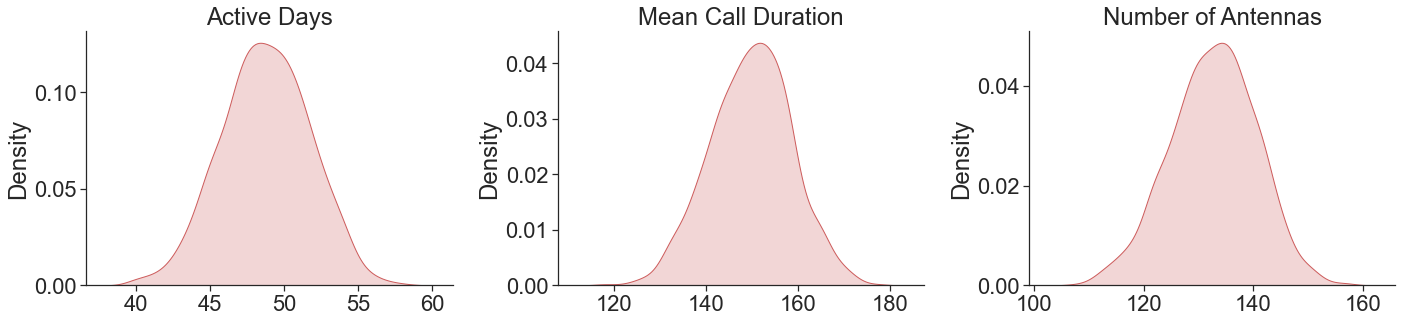

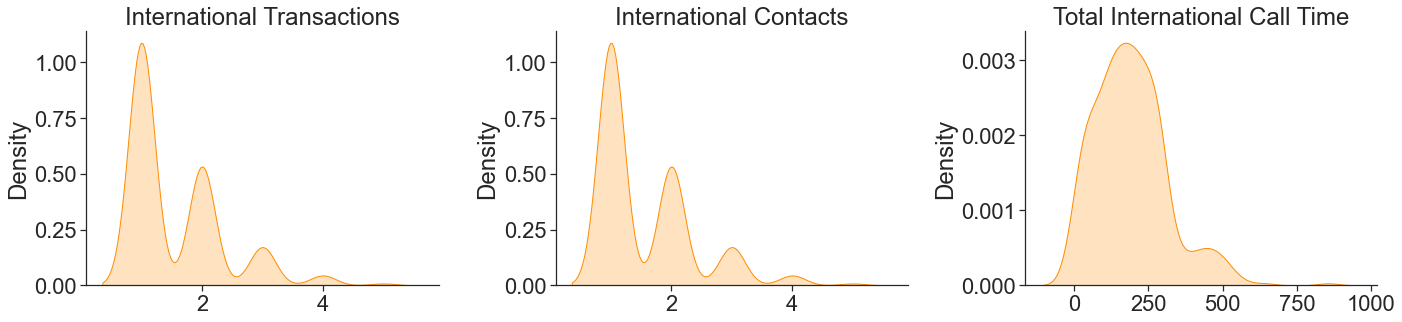

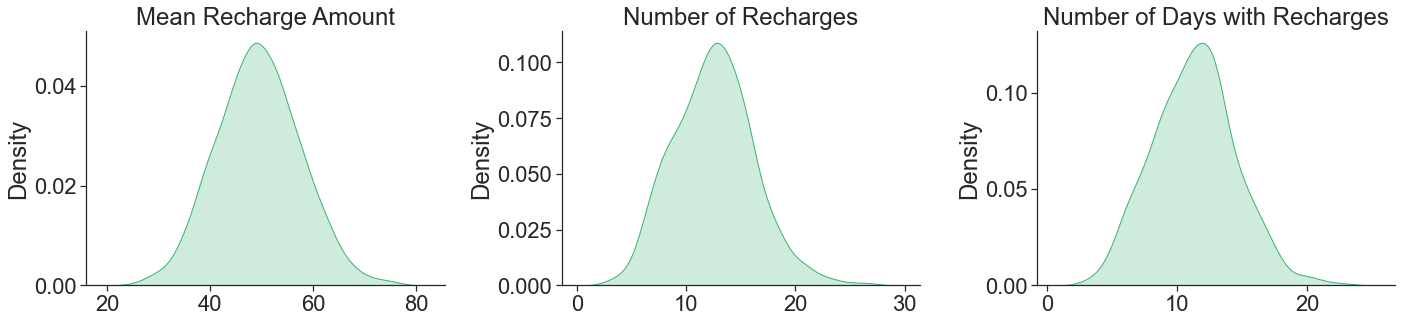

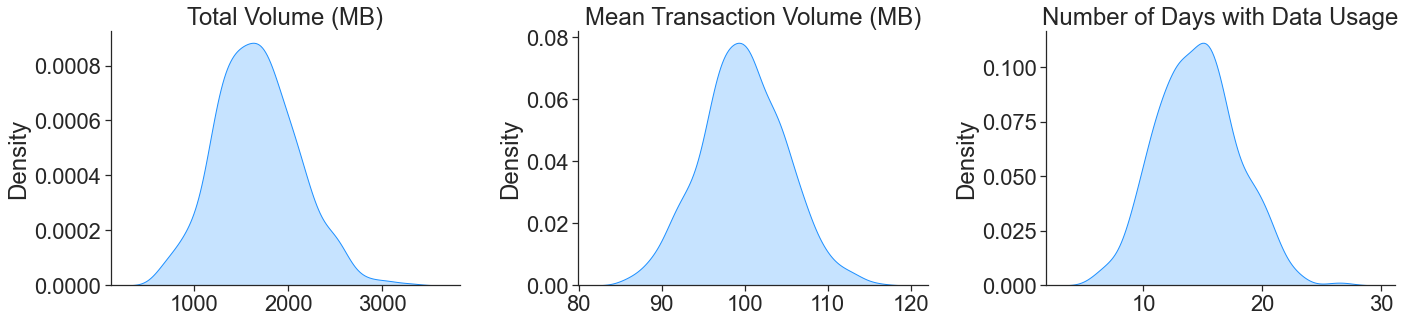

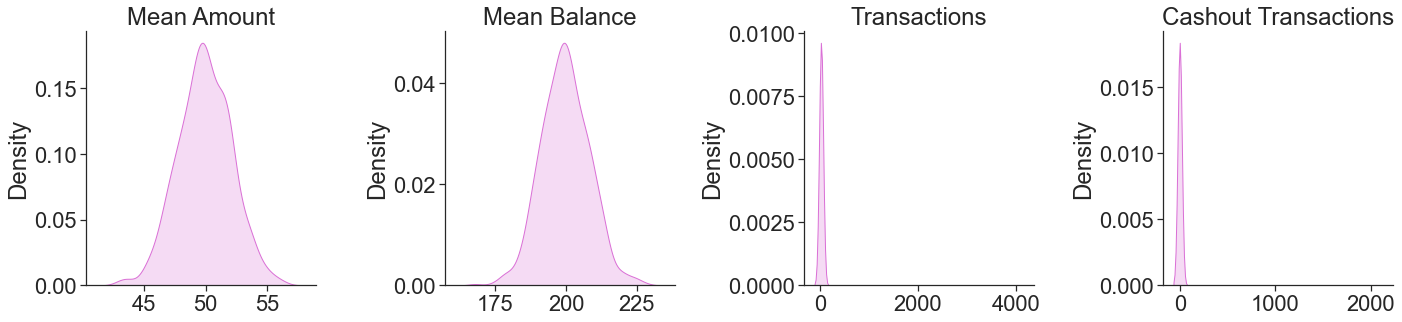

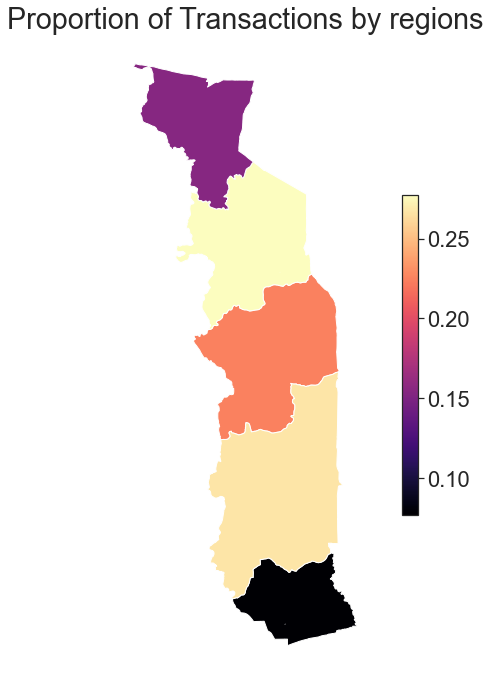

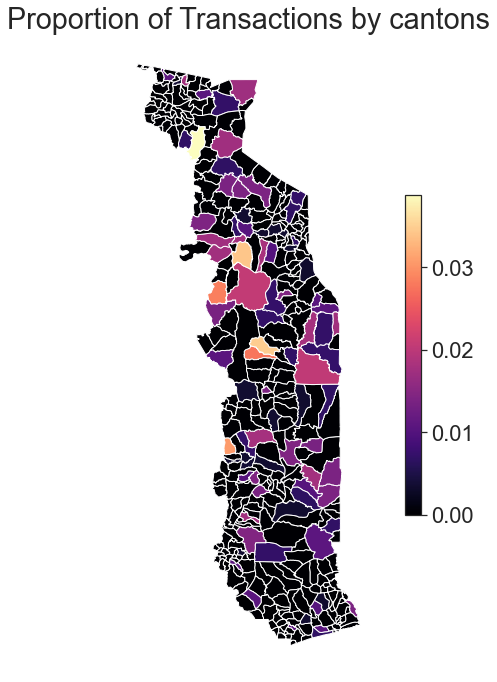

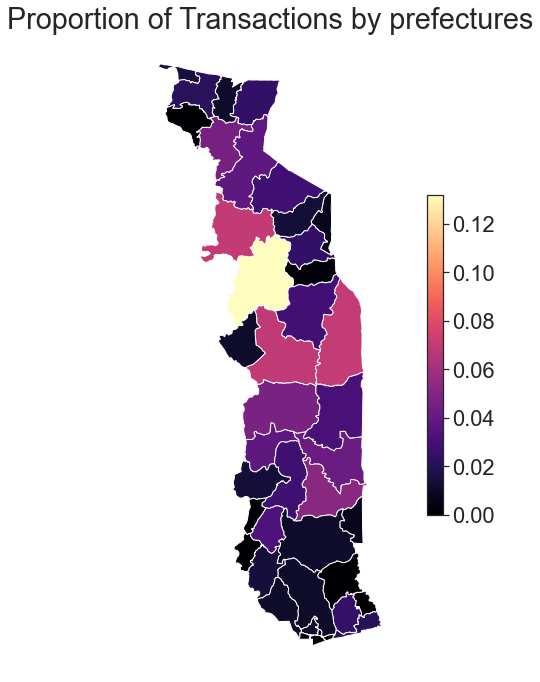

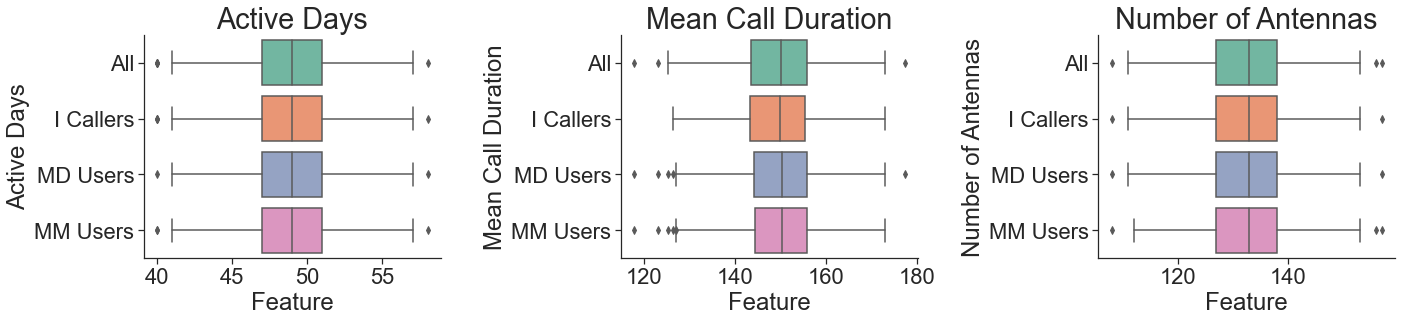

In [6]:
featurizer.feature_plots()